# "Visualization using seaborn"
> "Datavisualization for initial data analysis"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Vadim 
- categories: [visuals, jupyter]


## Numeric not ordered
 
 
Examples: 
   - number of observations (different kind of)
   - number of voters per state
   -  phone codes per state
   


Sns  high level overview
https://seaborn.pydata.org/tutorial/function_overview.html

--- link to dataviz schema - 

###  Relational data

### Distribution

Show comparion  of Violin  box and hist

In [1]:
import datetime, warnings, scipy 
import pandas as pd
# import pandas_profiling # otional
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

def plot_comparison(x, title):
    fig, ax = plt.subplots(4, 1, sharex=True, figsize=(12,8))
    sns.distplot(x, ax=ax[0])   # histogram
    ax[0].set_title('Histogram + KDE; x value, y deach time different  ; y count')
    sns.boxplot(x, ax=ax[1])   # Boxplot
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])  # Violin 
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    sns.ecdfplot(data=x,ax=ax[3], stat='proportion') 
    ax[3].set_title('ECDF plot')
    fig.suptitle(title, fontsize=16)
    plt.show()



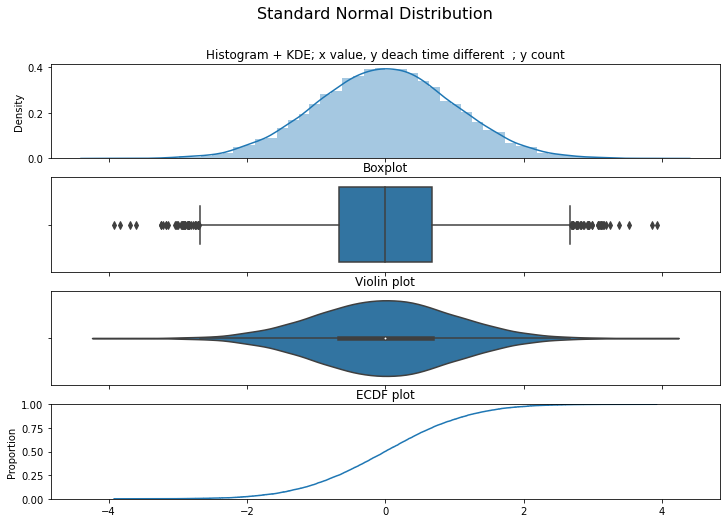

In [7]:
N = 10 ** 4
np.random.seed(42)
sample_gaussian = np.random.normal(size=N)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

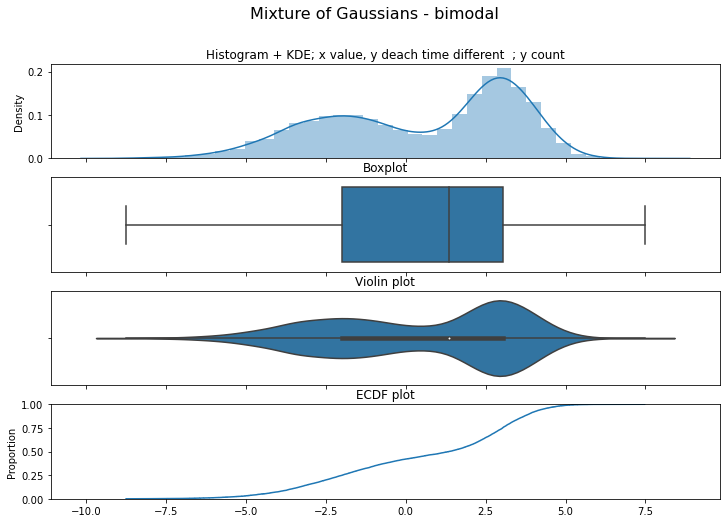

In [8]:
sample_bimodal = np.concatenate([np.random.normal(loc=-2, scale=2, size=int(N/2)),
                                 np.random.normal(loc=3, scale=1, size=int(N/2))])
plot_comparison(sample_bimodal, 'Mixture of Gaussians - bimodal')

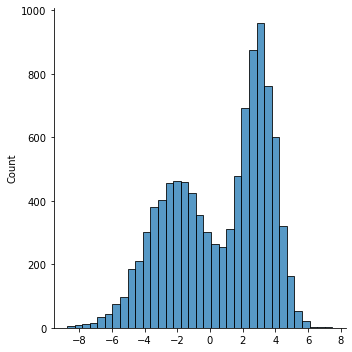

In [9]:
# not ordered simple Distribution 
sns.displot(data=sample_bimodal, kind='hist')

In [11]:
# shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compa

In [12]:
penguins= sns.load_dataset('penguins')

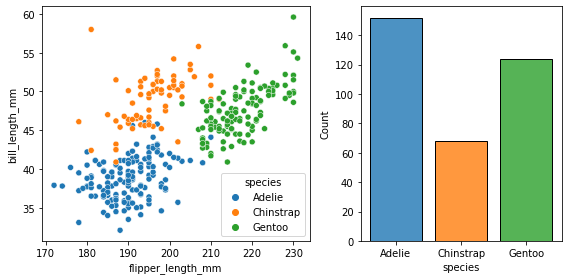

In [13]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

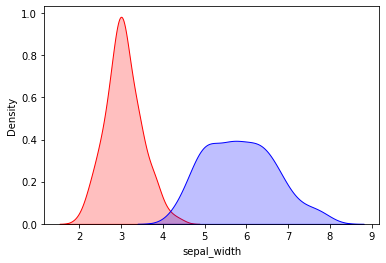

In [14]:
# library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# plot of 2 variables
p1=sns.kdeplot(df['sepal_width'], shade=True, color="r")
p1=sns.kdeplot(df['sepal_length'], shade=True, color="b")
plt.show()


## Numeric Ordered

### Line

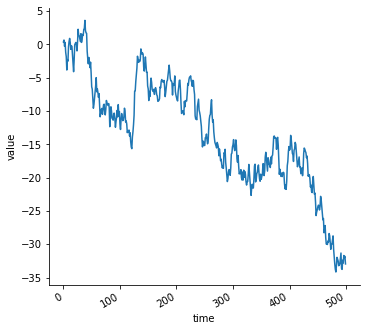

In [15]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [16]:
fmri = sns.load_dataset("fmri")
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


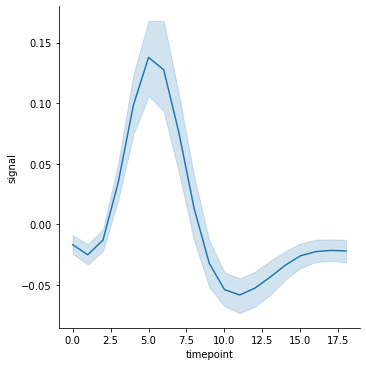

In [17]:

sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

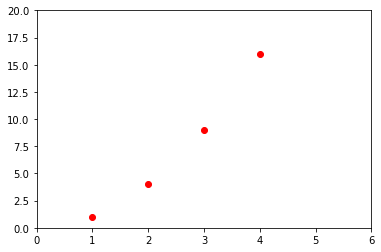

In [18]:
# lineplot 
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

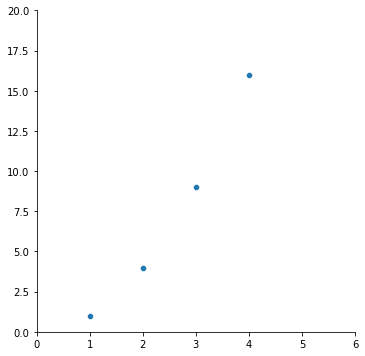

In [19]:
# lineplot 
sns.relplot([1, 2, 3, 4], [1, 4, 9, 16])
plt.axis([0, 6, 0, 20])
plt.show()

### Scatter

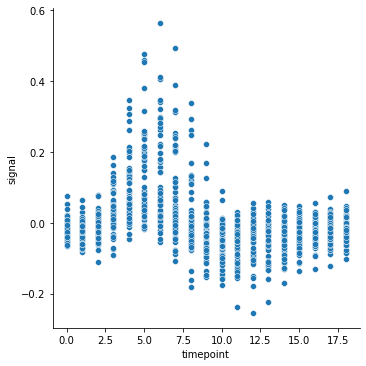

In [20]:
sns.relplot(x="timepoint", y="signal", kind="scatter", data=fmri);


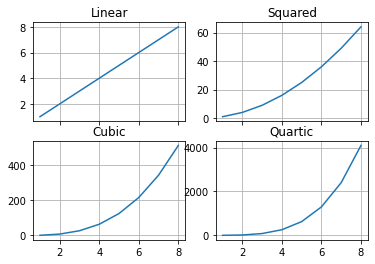

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

titles = ['Linear', 'Squared', 'Cubic', 'Quartic']
y_vals = [x, x * x, x**3, x**4]

# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title, y in zip(axes.flat, titles, y_vals):
    ax.plot(x, y)
    ax.set_title(title)
    ax.grid(True)

### Area

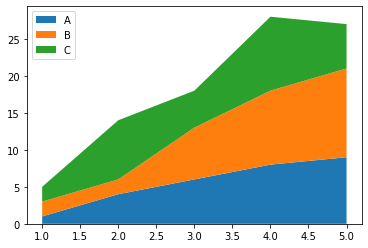

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Plot  Area 
plt.stackplot(x,y, labels=['A','B','C'])  
plt.legend(loc='upper left')
plt.show()


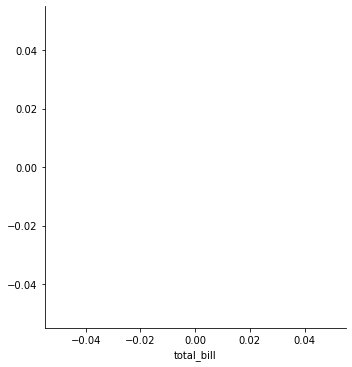

In [ ]:
tips=sns.load_dataset("tips")
sns.relplot(x="tip",y= data=tips);

In [ ]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

### Categorical

Here we will show  several categories and values for them 


#### Violin and  Boxplot for category (x)

Together with  simple histogram good first impression 

In [ ]:
#Box and  violin
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]
for std in range(6, 10):
  print(std)
ddf=pd.DataFrame.from_dict(all_data)
ddf.head(5)

6
7
8
9


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,6.295826,5.196595,3.306808,10.368467,-3.895729,-2.870517,6.467311,5.812862,-4.856069,-7.424335,11.160699,-1.849915,4.697823,0.129141,4.293983,8.408799,-6.765013,9.934909,8.405769,1.211940,-5.789181,6.267531,-2.586304,-2.983917,-0.354704,-6.687628,-7.361987,-8.460529,7.865163,-3.104652,-0.099949,2.815034,4.660669,-11.308186,-0.765524,-3.115905,4.410859,8.081108,3.301530,-1.374307,...,-3.619317,9.681318,-1.523904,-9.095273,-0.703359,2.972570,-4.215545,2.370417,-6.739674,-10.293329,-1.626631,0.517444,-6.542827,0.675258,-5.721867,0.301339,-2.898964,8.003420,2.881128,-4.498360,-7.924659,1.993390,-1.599650,3.817212,-6.709891,1.587271,0.558356,-7.177189,-5.393567,-0.272380,-3.583005,0.093715,-3.643103,4.328405,2.785666,4.959357,0.558072,-13.573699,5.944342,-7.642895
1,-9.714159,1.086545,0.515707,7.204036,-4.622671,-4.332094,-1.326759,-3.822245,11.380635,-0.717820,-10.010028,6.127681,-1.062175,-2.589784,0.097885,-0.571676,7.647341,3.694478,12.191742,-3.824271,11.601576,4.715410,-0.593936,-11.566830,4.504946,-6.400303,2.449148,0.686613,6.440932,2.913737,4.818091,-0.228964,3.797812,-0.041215,-9.532216,-2.222159,-16.287351,6.156880,-4.801712,-8.359627,...,-13.417744,1.140994,6.443059,-4.670928,-0.326633,-4.296397,-2.624538,3.618586,3.772401,0.010675,-0.754504,4.832428,10.365460,6.338193,11.410977,0.371137,-11.745067,-2.142325,-1.130717,7.892386,-0.194661,0.203075,-5.872184,-6.983265,1.377974,-10.969161,0.537690,1.606457,8.151308,0.094924,-7.921901,-4.889639,-8.983292,-7.240465,6.011052,-7.900238,2.975677,7.112989,-21.970376,-3.444214
2,12.881220,3.791821,-18.492249,-3.625449,-6.653355,-2.105036,-2.026996,0.837128,-2.707500,-9.184221,-4.221775,-0.966485,1.394287,-5.111171,-0.680627,13.015172,5.836066,3.098947,1.088597,1.268748,-0.698917,-5.849370,9.973692,5.698744,-9.380506,3.511613,-4.205585,3.617175,6.635580,16.823379,4.088321,17.128237,-4.905860,16.448438,-0.195672,13.463014,8.870895,7.642462,-3.530440,-3.703156,...,4.024584,-10.839706,9.841249,-8.117942,1.796838,-1.232860,-16.100428,13.297466,7.578057,-20.601347,3.159366,-1.942942,5.944509,0.172885,14.570568,-13.103542,0.759154,-1.386811,4.441340,3.385841,-6.478977,-10.035242,6.252055,-8.944769,-6.801974,1.898800,1.656156,0.287739,-2.049426,-4.652481,0.257406,-2.018110,-3.441745,4.455858,4.824423,-3.347953,13.122325,6.851431,4.041598,0.668767
3,2.506632,-0.630992,-0.326357,-20.307119,-13.114656,-3.950933,-0.192611,-8.226074,9.422215,2.671719,-9.344425,-2.047111,8.138812,-13.317688,-3.960878,14.459736,-9.252112,-8.698798,6.682870,14.940897,-16.902391,1.198006,1.341801,7.713871,5.998581,1.827239,-2.591409,10.868199,-2.469000,10.905127,12.797560,-6.313015,-0.875337,-1.131700,8.143948,6.711376,-17.220705,-10.830476,3.727351,-12.850858,...,-1.503009,7.625294,-1.850666,10.174138,-4.920469,-1.604776,-0.373441,-5.598822,-0.743738,0.580005,4.718239,13.912782,-6.239996,-0.680113,15.312143,-7.402881,-8.150332,0.613902,-4.561078,22.727851,-3.097166,2.282456,9.797883,-5.287433,10.787993,-8.496429,-14.184848,6.592398,-7.972791,-14.004307,-1.398185,6.866293,-15.636616,-9.132841,2.753904,6.927100,17.219411,0.230163,-0.870910,-7.030377


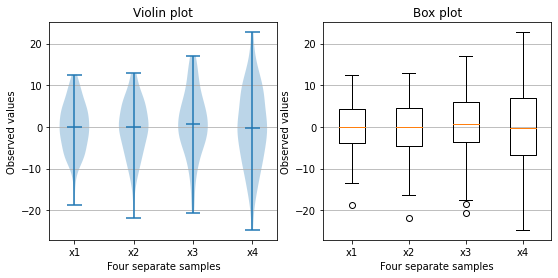

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# plot violin plot
axes[0].violinplot(ddf,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('Violin plot')

# plot box plot
axes[1].boxplot(ddf)
axes[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

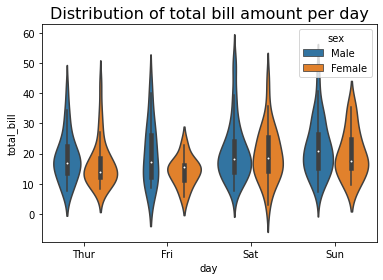

In [ ]:
ax = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
ax.set_title('Distribution of total bill amount per day', fontsize=16);


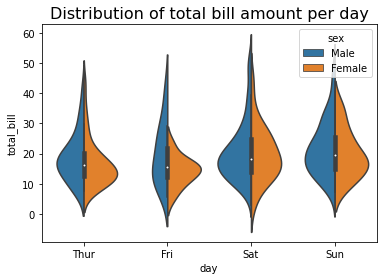

In [ ]:
ax = sns.violinplot(x="day", y="total_bill", hue="sex", split=True, data=tips)
ax.set_title('Distribution of total bill amount per day', fontsize=16);

#### ECDF  
other view of distribution 


TypeError: can't multiply sequence by non-int of type 'list'

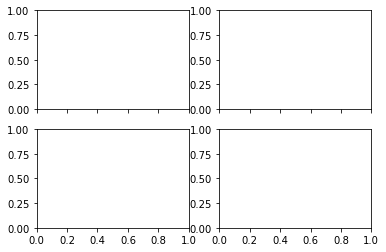

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

titles = ['Linear', 'Squared', 'Cubic', 'Quartic']
x = [1,3, 5, 7]
y_vals = [x, x * x, x**3, x**4]

# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title, y in zip(axes.flat, titles, y_vals):
    ax.plot(x, y)
    ax.set_title(title)
    ax.grid(True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

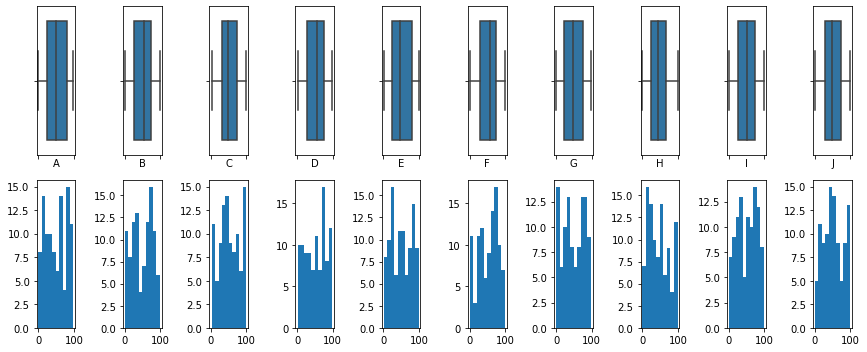

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 10, sharex=True, gridspec_kw={"height_ratios":(.35, .35)}, 
                                    figsize = (12, 5))

df = pd.DataFrame(np.random.randint(0,100,size=(100, 10)),columns=list('ABCDEFGHIJ'))

for i, c in enumerate(df):
    sns.boxplot(df[c], ax=axes[0,i])
    axes[1,i].hist(df[c])
plt.tight_layout()
plt.show()

In [ ]:
sns.barplot(x="gdp_per_capita", y="country", data=df.head(), orient='h')
#Set theme, then plot violin plotPython
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


p = sns.lineplot('week', 'mean', data = patient)
p.fill_between('week', y1 = 'min', y2 = 'max',  data = patient, alpha = 0.2)

plt.show()

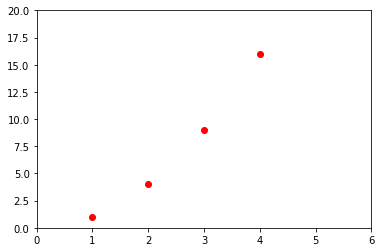

In [ ]:
# lineplot 
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [ ]:
plt.relplot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()


AttributeError: ignored